### Check allometries of temperate sites

### Libraries

In [34]:
from scipy.stats import qmc
import numpy as np
import xarray as xr
import csv
import pandas as pd
import os
import netCDF4 as nc4
import sys
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                     
import shutil                                                                                                                                                       
import tempfile 
import random

#import functions_py.modp as mp
import fates_xarray_functions as fa

import math as m
from scipy.optimize import curve_fit
from scipy.stats import linregress


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))

### DBH to height

In [19]:
p1 = [1.67, 1.21]
p2 = [0.997, 0.89]
maxdbh = [55, 60]

def d2hpwr (d, maxdbh, p1, p2) :
    h = p1 * min(d, maxdbh)**p2
    return  h

def d2hmc (d, p1, p2, p3) :
    h = (p1 * d**p2) / (p3 + d**p2)
    return h

dbh = np.arange(1,100,1)

bia_h1 = [d2hpwr(d, maxdbh[0], p1[0], p2[0])  for  d  in dbh]
bia_h2 = [d2hpwr(d, maxdbh[1], p1[1], p2[1])  for  d  in dbh]

bci_h1 = [d2hmc(d, 58.0, 0.73,  21.8) for d in dbh]

''

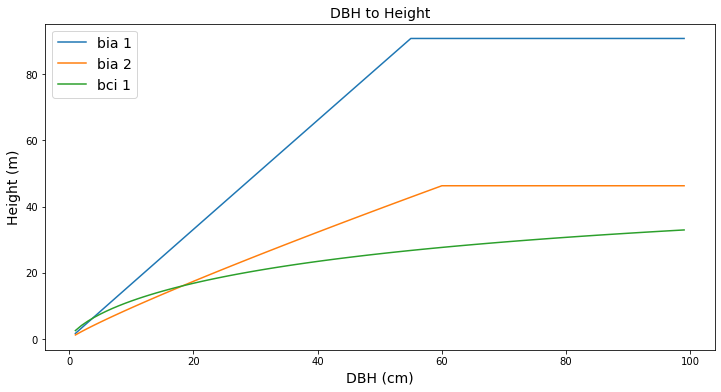

In [20]:
fig1, ((f1ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(12,6))

f1ax0.plot(dbh, bia_h1, label = 'bia 1')
f1ax0.plot(dbh, bia_h2, label = 'bia 2')
f1ax0.plot(dbh, bci_h1, label = 'bci 1')
f1ax0.set_title(r'DBH to Height', fontsize = 14)
f1ax0.set_ylabel(r'Height (m)', fontsize = 14)
f1ax0.set_xlabel(r'DBH (cm)', fontsize = 14) 
f1ax0.legend(fontsize=14)
;

### Biomass

In [21]:
def d2bagw_chave (d, h, p1, p2, wd, c2b) : 
    bagw = (p1 * (wd * d**2 * h)**p2 ) / c2b
    return  bagw

def d2bagw_salda (d, h, p1, p2,  p3, p4, wd, c2b, agb_frac) : 
    bagw = agb_frac * p1 * (h**p2) * (d**p3) * (wd**p4)
    return(bagw)

def agb_wrapper ( d, dbhmax, amode, hmode, hp1, hp2, hp3, p1,  p2, p3, p4, wd, c2b,  agb_frac ) : 
    if hmode ==  3 : 
        h = d2hpwr(d, dbhmax, hp1, hp1) 
    if hmode == 5 :
        h = d2hmc(d, hp1, hp2, hp3)
        
    if amode == 2 : 
        agb = d2bagw_salda(d, h, p1, p2, p3, p4, wd, c2b, agb_frac) 
    if amode == 3 : 
        agb = d2bagw_chave(d, h, p1, p2, wd, c2b)
            
    return agb




In [22]:
#  BIA - pwr and salda
bia_agb_pft1 = [agb_wrapper(d, dbhmax =  55, amode=2, hmode=3, hp1=1.67, hp2=0.997, hp3=0,
                            p1=0.1336, p2=2.2, p3=1.94, p4=0.931, 
                            wd = 0.527, c2b=2, agb_frac=0.6) for d in dbh]
bia_agb_pft2 = [agb_wrapper(d, dbhmax = 60, amode=2, hmode=3, hp1=1.21, hp2=0.89, hp3=0,
                            p1=0.048, p2=2.61, p3=1.94, p4=0.931, 
                            wd = 0.317, c2b=2, agb_frac=0.6) for d in dbh]
bia_agb_pft3 = [agb_wrapper(d, dbhmax = 60, amode=2, hmode=3, hp1=1.21, hp2=0.89, hp3=0,
                            p1=0.048, p2=2.61, p3=1.94, p4=0.931, 
                            wd = 0.475, c2b=2, agb_frac=0.6) for d in dbh]

#  BCI - martinez-cano and chave
bci_agb_pft1 = [agb_wrapper(d, dbhmax = 0, amode=3, hmode=5, hp1=58.0, hp2=0.73, hp3=21.8, 
                            p1=0.0673, p2=0.976, p3=0,p4=0,
                            wd=0.413, c2b=2, agb_frac=0)  for d in dbh]
bci_agb_pft2 = [agb_wrapper(d, dbhmax = 0, amode=3, hmode=5, hp1=58.0, hp2=0.73, hp3=21.8, 
                            p1=0.0673, p2=0.976, p3=0,p4=0,
                            wd=0.620, c2b=2, agb_frac=0)  for d in dbh]
bci_agb_pft3 = [agb_wrapper(d, dbhmax = 0, amode=3, hmode=5, hp1=58.0, hp2=0.73, hp3=21.8, 
                            p1=0.0673, p2=0.976, p3=0,p4=0,
                            wd=0.409, c2b=2, agb_frac=0)  for d in dbh]

''

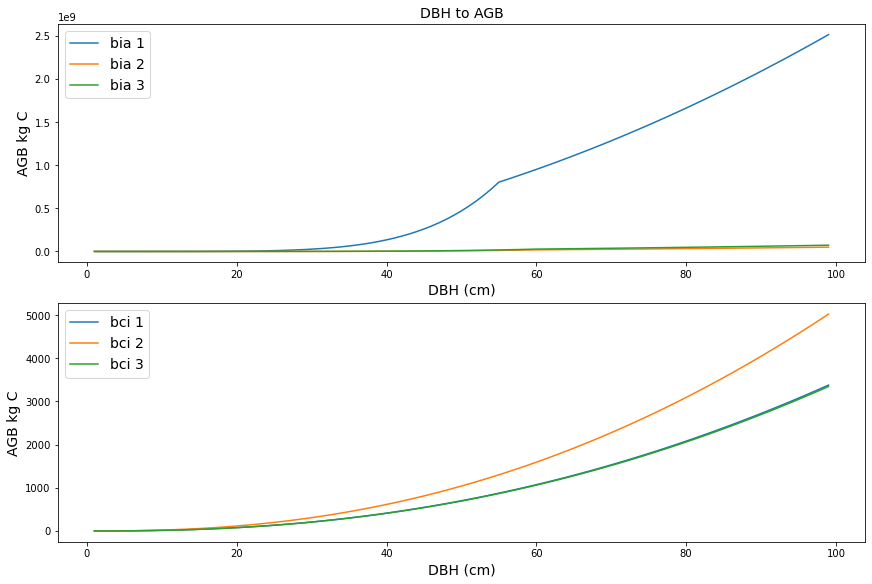

In [23]:
fig2, ((f2ax0,f2ax1)) = plt.subplots(nrows=2,ncols=1, figsize=(12,8), 
                                     constrained_layout=True)

f2ax0.plot(dbh, bia_agb_pft1, label = 'bia 1')
f2ax0.plot(dbh, bia_agb_pft2, label = 'bia 2')
f2ax0.plot(dbh, bia_agb_pft3, label = 'bia 3')
f2ax0.set_title(r'DBH to AGB', fontsize = 14)
f2ax0.set_ylabel(r'AGB kg C', fontsize = 14)
f2ax0.set_xlabel(r'DBH (cm)', fontsize = 14) 
f2ax0.legend(fontsize=14)

f2ax1.plot(dbh, bci_agb_pft1, label = 'bci 1')
f2ax1.plot(dbh, bci_agb_pft2, label = 'bci 2')
f2ax1.plot(dbh, bci_agb_pft3, label = 'bci 3')
f2ax1.set_xlabel(r'DBH (cm)', fontsize = 14) 
f2ax1.set_ylabel(r'AGB kg C', fontsize = 14)
f2ax1.legend(fontsize=14)

;

### With allometries from Tallo and wood  density from Zanne

In [24]:
#  BIA - martinez cano and chave
bia_agb_pft1 = [agb_wrapper(d, dbhmax =  55, amode=3, hmode=5, hp1=50.77, hp2=1.277, hp3=84.05,
                            p1=0.0673, p2=0.976, p3=0,p4=0,
                            wd = 0.37, c2b=2, agb_frac=0.6) for d in dbh]

bia_agb_pft2 = [agb_wrapper(d, dbhmax = 60, amode=3, hmode=5, hp1=132.81, hp2=0.766, hp3=55.65,
                            p1=0.0673, p2=0.976, p3=0,p4=0,
                            wd = 0.525, c2b=2, agb_frac=0.6) for d in dbh]

bia_agb_pft3 = [agb_wrapper(d, dbhmax = 60, amode=3, hmode=5, hp1=84.05, hp2=55.65, hp3=85.07,
                            p1=0.0673, p2=0.976, p3=0,p4=0,
                            wd = 0.693, c2b=2, agb_frac=0.6) for d in dbh]


''

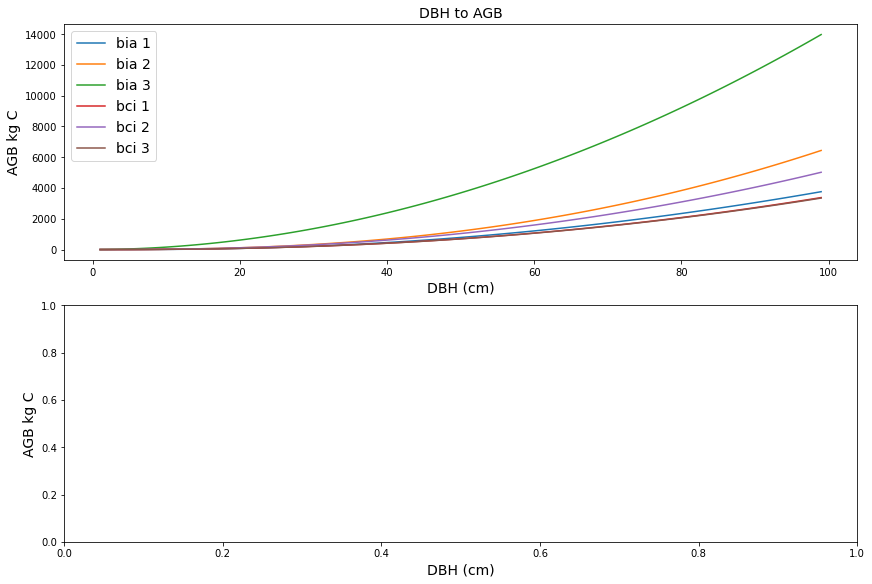

In [25]:
fig2, ((f2ax0, f2ax1)) = plt.subplots(nrows=2,ncols=1, figsize=(12,8), 
                                     constrained_layout=True)

f2ax0.plot(dbh, bia_agb_pft1, label = 'bia 1')
f2ax0.plot(dbh, bia_agb_pft2, label = 'bia 2')
f2ax0.plot(dbh, bia_agb_pft3, label = 'bia 3')
f2ax0.set_title(r'DBH to AGB', fontsize = 14)
f2ax0.set_ylabel(r'AGB kg C', fontsize = 14)
f2ax0.set_xlabel(r'DBH (cm)', fontsize = 14) 
f2ax0.legend(fontsize=14)

f2ax0.plot(dbh, bci_agb_pft1, label = 'bci 1')
f2ax0.plot(dbh, bci_agb_pft2, label = 'bci 2')
f2ax0.plot(dbh, bci_agb_pft3, label = 'bci 3')
f2ax1.set_xlabel(r'DBH (cm)', fontsize = 14) 
f2ax1.set_ylabel(r'AGB kg C', fontsize = 14)
f2ax0.legend(fontsize=14)

;

###  From Chojnacky

In [42]:
def d2agb_choj (d, b0,  b1) :
    agb = np.exp(b0 + b1 * np.log(d))
    return agb

[0.12031577 0.97742065]


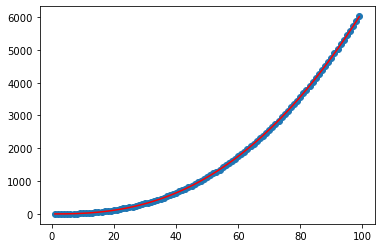

In [44]:
# Pinus sylvestris
pinus_agb = [d2agb_choj(d, -2.6177, 2.4638) for d in dbh]
plt.scatter(dbh, pinus_agb)

# now get best fit using Chave equation 
def pinus_agb_wrapper ( d, p1, p2) : 
    h = d2hmc(d, 130.66, 0.655, 63.75)
    agb = d2bagw_chave(d, h, p1, p2, 0.422, 2)
    return agb    

agb_ps_pinus, agb_cov_pinus = curve_fit(f=pinus_agb_wrapper, xdata=dbh, ydata=pinus_agb)

print(agb_ps_pinus)

pinus_curve = [pinus_agb_wrapper(d, agb_ps_pinus[0], agb_ps_pinus[1])  for  d  in dbh]

plt.plot(dbh, pinus_curve, color='red')

[0.07736741 0.98929951]


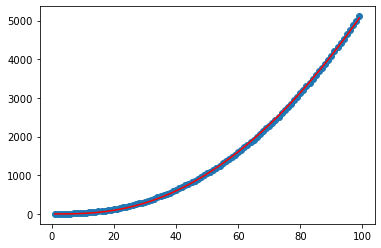

In [45]:
# Picea abies
picea_agb = [d2agb_choj(d, -2.1364, 2.3233) for d in dbh]
plt.scatter(dbh, picea_agb)

# now get best fit using Chave equation 
def picea_agb_wrapper ( d, p1, p2) : 
    h = d2hmc(d, 50.76593202,  1.27726737, 84.05817443)
    agb = d2bagw_chave(d, h, p1, p2, 0.37, 2)
    return agb    

agb_ps_picea, agb_cov_picea = curve_fit(f=picea_agb_wrapper, xdata=dbh, ydata=picea_agb)

print(agb_ps_picea)

picea_curve = [picea_agb_wrapper(d, agb_ps_picea[0], agb_ps_picea[1])  for  d  in dbh]

plt.plot(dbh, picea_curve, color='red')

[0.14423187 0.93127223]


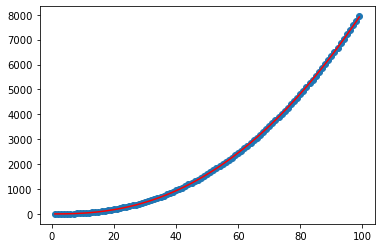

In [47]:
# Betula pendula
betula_agb = [d2agb_choj(d, -1.8096, 2.3480) for d in dbh]
plt.scatter(dbh, betula_agb)

# now get best fit using Chave equation 
def betula_agb_wrapper ( d, p1, p2) : 
    h = d2hmc(d, 132.81457376,   0.76638366,  55.65241215)
    agb = d2bagw_chave(d, h, p1, p2, 0.525, 2)
    return agb    

agb_ps_betula, agb_cov_betula = curve_fit(f=betula_agb_wrapper, xdata=dbh, ydata=betula_agb)

print(agb_ps_betula)

betula_curve = [betula_agb_wrapper(d, agb_ps_betula[0], agb_ps_betula[1])  for  d  in dbh]

plt.plot(dbh, betula_curve, color='red')

[0.00869785 1.23907918]


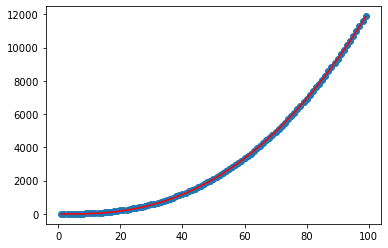

In [49]:
# Carpinus betulus
carpinus_agb = [d2agb_choj(d, -2.2652, 2.5349) for d in dbh]
plt.scatter(dbh, carpinus_agb)

# now get best fit using Chave equation 
def carpinus_agb_wrapper ( d, p1, p2) : 
    h = d2hmc(d, 23.26696557,  1.93615377, 85.07052337)
    agb = d2bagw_chave(d, h, p1, p2, 0.693, 2)
    return agb    

agb_ps_carpinus, agb_cov_carpinus = curve_fit(f=carpinus_agb_wrapper, xdata=dbh, ydata=carpinus_agb)

print(agb_ps_carpinus)

carpinus_curve = [carpinus_agb_wrapper(d, agb_ps_carpinus[0], agb_ps_carpinus[1])  for  d  in dbh]

plt.plot(dbh, carpinus_curve, color='red')